# create the target grid onto which all the GCMs will be interpolated 

In [59]:
%matplotlib inline
from matplotlib import pyplot as plt

In [60]:
import numpy as np

In [61]:
import xarray as xr

In [62]:
res = 1

In [63]:
lats = np.arange(-89.5, 89.5 + res, res)

In [67]:
lons = np.arange(0.5, 360, res)

In [69]:
d = {}

In [70]:
d['lat'] = (('lat'), lats)

In [71]:
d['lon'] = (('lon'), lons)

In [72]:
dest_grid = xr.Dataset(d)

In [73]:
dest_grid

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    *empty*

In [74]:
import xesmf as xe

In [83]:
xe.__version__

'0.2.1'

In [98]:
def regrid(ds_in, target_ds,  method='bilinear'):
    """Convenience function for one-time regridding"""
    regridder = xe.Regridder(ds_in, target_ds, method, periodic=True)
    ds_out = regridder(ds_in)
    regridder.clean_weight_file()
    return ds_out

In [76]:
dest_grid.to_netcdf('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/target_grid/target_grid_1x1.nc') 

In [95]:
dset = xr.open_dataset('/home/nicolasf/research/Smart_Ideas/data/GCMs/NC/ECMWF/T2M/CLIMATOLOGY/CLIMATOLOGY_ECMWF_T2M_1993_2016.nc')

In [96]:
dset

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, month: 12, step: 3)
Coordinates:
    surface  int64 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * step     (step) int64 3 4 5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m      (month, step, lat, lon) float32 ...

In [99]:
ess = regrid(dset, dest_grid)

Create weight file: bilinear_181x360_180x360_peri.nc
using dimensions ('lat', 'lon') from data variable t2m as the horizontal dimensions for this dataset.
Remove file bilinear_181x360_180x360_peri.nc


In [100]:
dset

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, month: 12, step: 3)
Coordinates:
    surface  int64 ...
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * step     (step) int64 3 4 5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m      (month, step, lat, lon) float32 228.72192 228.72192 ... 256.98917

In [101]:
ess

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, month: 12, step: 3)
Coordinates:
    surface  int64 ...
  * step     (step) int64 3 4 5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    t2m      (month, step, lat, lon) float64 229.1 229.1 229.1 ... 257.0 257.0
Attributes:
    regrid_method:  bilinear

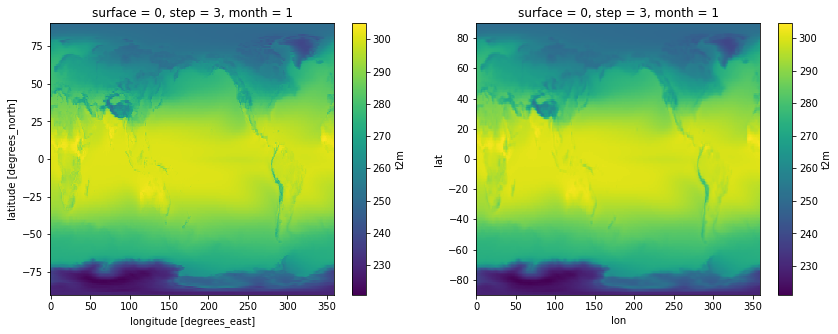

In [102]:
f, axes = plt.subplots(ncols=2, figsize=(14, 5))
dset['t2m'][0,0,:,:].plot(ax=axes[0])
ess['t2m'][0,0,:,:].plot(ax=axes[1])